**Exploratory Data Analysis:**

This file is composed of components of the EDA process for preliminary exploration of your data. This code is not a complete EDA, but rather a preliminary examination of data. Please see the Table of Contents to explore different areas of EDA.

DataSet link: https://drive.google.com/file/d/1mV_ifvzzrlPWgdSzrwW5ZK-aF3S9tydZ/view


The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  

In [85]:
#importing requirements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy import stats
filterwarnings("ignore")
%matplotlib inline     
sns.set(color_codes=True)

In [86]:
# read an excel file and convert into a dataframe object
df = pd.DataFrame(pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx"))
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


##Description of Data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [88]:
#converting data type int to datetime
df[['12graduation']] = df[['12graduation']].apply(pd.to_datetime)
df[['12graduation']] = df[['12graduation']].values.astype('datetime64[s]')

In [89]:
df[['12graduation']].dtypes

12graduation    datetime64[ns]
dtype: object

In [90]:
df.isnull().sum()   # Used to count the number of rows

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [91]:
df.describe()

,ID,Salary,10percentage,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


##Univariant Analysis

In [92]:
df['10board'].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [93]:
df['10board'] = df['10board'].replace(0,'cbse')

In [94]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric

In [95]:
tenth_brd = []
for i in df["10board"]:
    if i=="cbse"  or i=="cbse " or i=='cbse[gulf zone]' or i=="cgbse" or i=='central board of secondary education' or i=="cbese":
        tenth_brd.append("CBSE")
    elif i=="icse" or i=="icse board" or i=="ise" or i=="isc board" or i=="cicse":
        tenth_brd.append('ICSE')
    else:
        tenth_brd.append('STATE BOARD')

In [96]:
df['10board'] = tenth_brd

In [97]:
df['10board'].value_counts()

STATE BOARD    1954
CBSE           1761
ICSE            283
Name: 10board, dtype: int64

In [98]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [99]:
inter = []
for i in df["12board"]:
    if i=="cbse"  or i=="cbse,new delhi" or i=='cbse board' or i=='cbsc' or i=='cbese' or i=='central board of secondary education':
        inter.append("CBSE")
    elif i=="icse" or i=="isc board" or i=='aissce' or i=='all india board' or i=='isc board , new delhi' or i=='isce' or i=='cicse' or i=='ibe' or i=='isc':
        inter.append('ICSE')
    else:
        inter.append('STATE BOARD')

In [100]:
df['12board']=inter

In [101]:
df['12board'].value_counts()

STATE BOARD    2400
CBSE           1416
ICSE            182
Name: 12board, dtype: int64

In [102]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [103]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [104]:
df['CollegeCityID'].value_counts()

272      94
64       38
11759    35
44       35
47       33
         ..
128       1
5068      1
8637      1
9361      1
4883      1
Name: CollegeCityID, Length: 1350, dtype: int64

In [105]:
df['CollegeID'].value_counts()

272      94
64       38
11759    35
44       35
47       33
         ..
128       1
5068      1
8637      1
9361      1
4883      1
Name: CollegeID, Length: 1350, dtype: int64

In [106]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [107]:
sorted(df['CollegeTier'].unique())

[1, 2]

In [108]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [109]:
sorted(df['CollegeCityTier'].unique())

[0, 1]

In [110]:
df['CollegeState'].nunique()

26

In [111]:
df['Gender'].unique()


array(['f', 'm'], dtype=object)

In [112]:
gy_list = sorted(df['GraduationYear'].unique())

### Observations :

1. As can be seen in df.info(), there are no missing values (null values )in the data. 
2. The Dataset comprises of the AMCAT exams held from year 2007 to 2017 , except for 2008.
3. A total of 46 Specializations are available for 3998 Students included in the Dataset, who have completed either of the Degrees : B.Tech/B.E. , MCA, M.Tech./M.E. , M.Sc. (Tech.)
4. A total of 418 unique Designations are designated among all students in 339 Cities or 26 States.
5. Number of Unique ID's identifying the college which the candidate attended is equal to the Number of Unique ID's to identify the city in which the college is located in.
6. Maximum Designations among all the Students in this Dataset is for Software Engineer (540).
7. Maximum number of Students have their Job City as Bangalore(627).
8. Majority of the Students are still working in their Respective Companies(1875).
9. Majority of the Students completed their Specialization in Electronics and Communication Engineering.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f068480e310>,
      dtype=object)

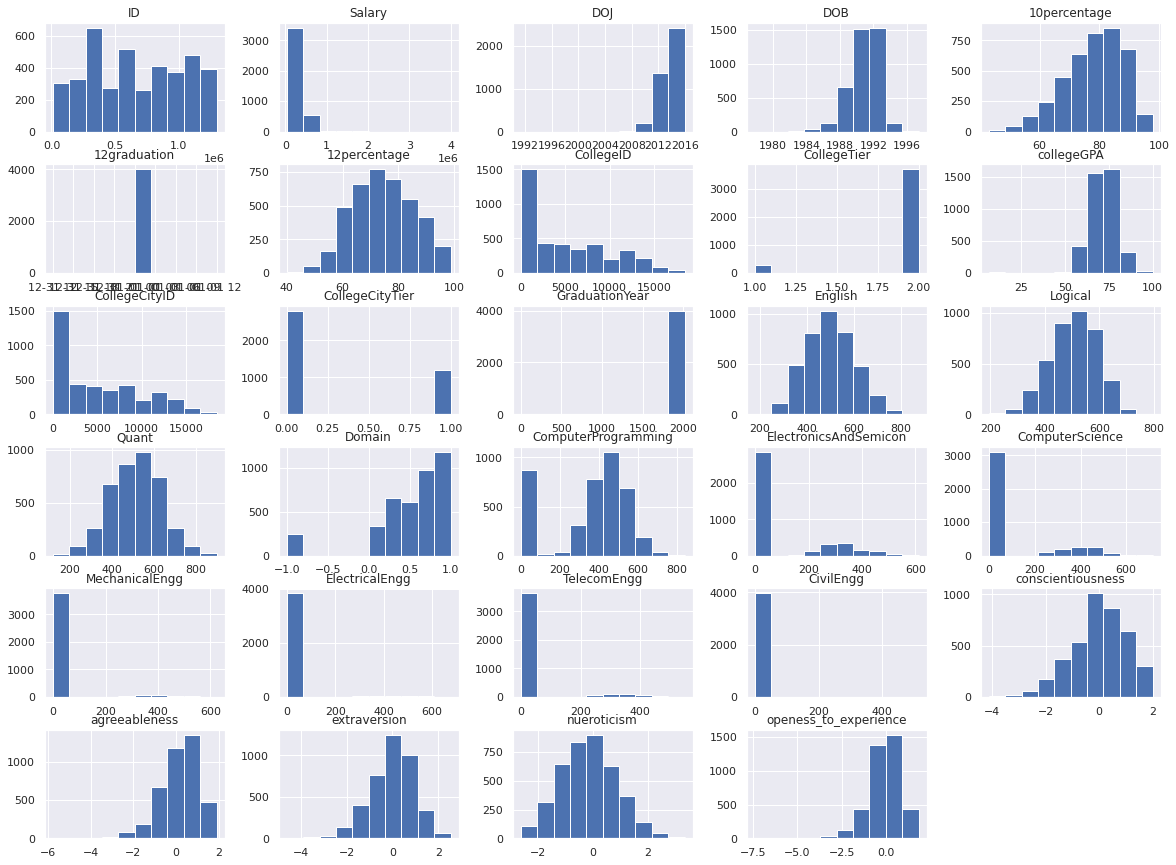

In [113]:
df.hist(figsize = (20, 15))

As a part of this case study, we will focus on Domian, ComputerProgramming, ElectronicAndSemicon, ComputerScience, MechanicalEngg, TelecomEngg and CivilEngg.
From the above graph it is clear that listed columns have missing values.

In [114]:
col=df.columns
output=[len(df[df[x]==-1])for x in col]
print(output)

[0, 0, 0, 0, 0, 0, 461, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246, 868, 2854, 3096, 3763, 3837, 3624, 3956, 0, 0, 0, 0, 0]


In [115]:
df.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [116]:
df.Domain.value_counts()

-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.999250      1
 0.010995      1
 0.639587      1
 0.031150      1
 0.938588      1
Name: Domain, Length: 243, dtype: int64

In [117]:
df.ComputerProgramming.value_counts()

-1      868
 445    151
 435    144
 475    139
 465    134
       ... 
 214      1
 494      1
 840      1
 394      1
 554      1
Name: ComputerProgramming, Length: 79, dtype: int64

In [118]:
df.ElectronicsAndSemicon.value_counts()

-1      2854
 333     124
 300     114
 366     103
 266      88
 400      84
 292      74
 324      66
 356      66
 233      53
 388      47
 433      46
 200      43
 260      36
 466      31
 452      29
 228      24
 500      23
 420      22
 196      16
 166      12
 484      10
 516       9
 533       6
 548       5
 566       4
 133       4
 164       3
 612       2
Name: ElectronicsAndSemicon, dtype: int64

In [119]:
df.ComputerScience.value_counts()

-1      3096
 407     128
 376     123
 346     118
 438     111
 469      80
 315      77
 500      64
 284      50
 530      45
 253      30
 561      22
 223      14
 592      14
 623      10
 653       9
 192       3
 715       2
 684       1
 130       1
Name: ComputerScience, dtype: int64

In [120]:
df.MechanicalEngg.value_counts()

-1      3763
 366      20
 446      16
 438      15
 420      14
 376      13
 313      13
 393      13
 407      12
 346      11
 469      10
 473      10
 553       8
 435       7
 383       6
 340       6
 526       5
 409       5
 286       5
 500       4
 253       4
 284       3
 332       3
 538       3
 254       3
 580       3
 616       2
 564       2
 606       2
 223       2
 512       2
 561       2
 260       2
 358       1
 280       1
 315       1
 233       1
 306       1
 461       1
 180       1
 206       1
 623       1
Name: MechanicalEngg, dtype: int64

In [121]:
df.ElectricalEngg.value_counts()

-1      3837
 420      16
 446      14
 388      10
 473      10
 452      10
 356       9
 500       8
 580       8
 366       7
 324       7
 393       7
 553       6
 313       6
 516       5
 260       4
 292       4
 340       3
 228       3
 526       3
 484       3
 633       3
 548       2
 433       2
 606       2
 612       2
 660       2
 286       2
 676       1
 411       1
 206       1
Name: ElectricalEngg, dtype: int64

In [122]:
df.TelecomEngg.value_counts()

-1      3624
 393      45
 366      43
 260      35
 313      34
 340      32
 286      31
 420      26
 446      16
 388      14
 233      14
 473      13
 292      13
 356      12
 324      11
 206       8
 500       5
 526       5
 516       4
 484       4
 228       3
 548       2
 153       1
 196       1
 164       1
 452       1
Name: TelecomEngg, dtype: int64

In [123]:
df.CivilEngg.value_counts()

-1      3956
 356       6
 292       6
 388       4
 260       3
 320       3
 500       2
 300       2
 340       2
 516       1
 460       1
 420       1
 280       1
 433       1
 380       1
 452       1
 277       1
 166       1
 322       1
 200       1
 440       1
 400       1
 480       1
Name: CivilEngg, dtype: int64

###We will drop columns which have lot of outliers and unique ID's of users

##Handling outlier

In [124]:
DF=df.drop(['ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'],axis=1)
DF['JobCity']=DF['JobCity'].replace(-1, 'Bangalore')
DF['Domain']=DF['Domain'].replace(-1.000000, DF['Domain'].mean())
DF['ComputerProgramming']=DF['ComputerProgramming'].replace(-1, DF['ComputerProgramming'].mean())

In [125]:
numeric_data = DF.select_dtypes(include=[np.number])
categorical_data = DF.select_dtypes(exclude=[np.number])
categorical_data

,Unnamed: 0,DOJ,DOL,Designation,JobCity,Gender,DOB,10board,12graduation,12board,Degree,Specialization,CollegeState
0,train,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,STATE BOARD,1970-01-01,STATE BOARD,B.Tech/B.E.,computer engineering,Andhra Pradesh
1,train,2013-09-01,present,assistant manager,Indore,m,1989-10-04,CBSE,1970-01-01,CBSE,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,train,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,CBSE,1970-01-01,CBSE,B.Tech/B.E.,information technology,Uttar Pradesh
3,train,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,CBSE,1970-01-01,CBSE,B.Tech/B.E.,computer engineering,Delhi
4,train,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,CBSE,1970-01-01,CBSE,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,CBSE,1970-01-01,CBSE,B.Tech/B.E.,information technology,Haryana
3994,train,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,STATE BOARD,1970-01-01,STATE BOARD,B.Tech/B.E.,electronics and communication engineering,Telangana
3995,train,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,STATE BOARD,1970-01-01,STATE BOARD,B.Tech/B.E.,computer engineering,Orissa
3996,train,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,STATE BOARD,1970-01-01,STATE BOARD,B.Tech/B.E.,computer science & engineering,Karnataka


In [126]:
numeric_data

,ID,Salary,10percentage,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.30,95.80,1141,2,78.00,1141,0,2011,515,585,525,0.635979,445.000000,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.40,85.00,5807,2,70.06,5807,0,2012,695,610,780,0.960603,353.102801,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.00,68.20,64,2,70.00,64,0,2014,615,545,370,0.450877,395.000000,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.60,83.60,6920,1,74.64,6920,1,2011,635,585,625,0.974396,615.000000,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.00,76.80,11368,2,73.90,11368,0,2012,545,625,465,0.124502,353.102801,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,52.09,55.50,6268,2,61.50,6268,0,2010,365,334,475,0.276047,345.000000,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,90.00,93.00,4883,2,77.30,4883,1,2013,415,410,535,0.881620,325.000000,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,81.86,65.50,9786,2,70.00,9786,0,2012,475,475,465,0.488348,405.000000,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,78.72,69.88,979,2,70.42,979,1,2014,450,410,320,0.744758,445.000000,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


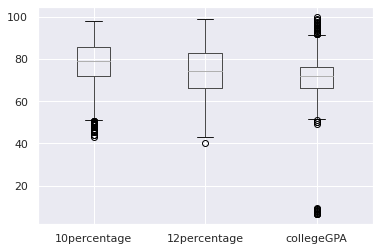

In [127]:
DF.boxplot(column=['10percentage', '12percentage', 'collegeGPA'])

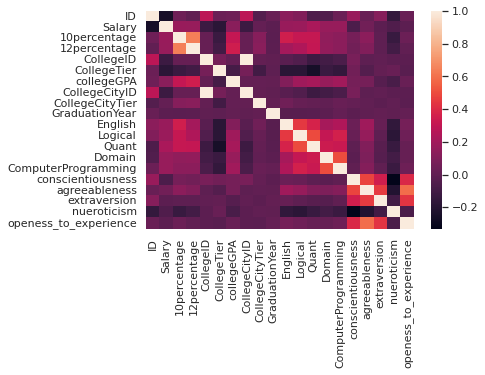

In [128]:
import seaborn as sns
corr = DF.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

##Bivariant Analysis

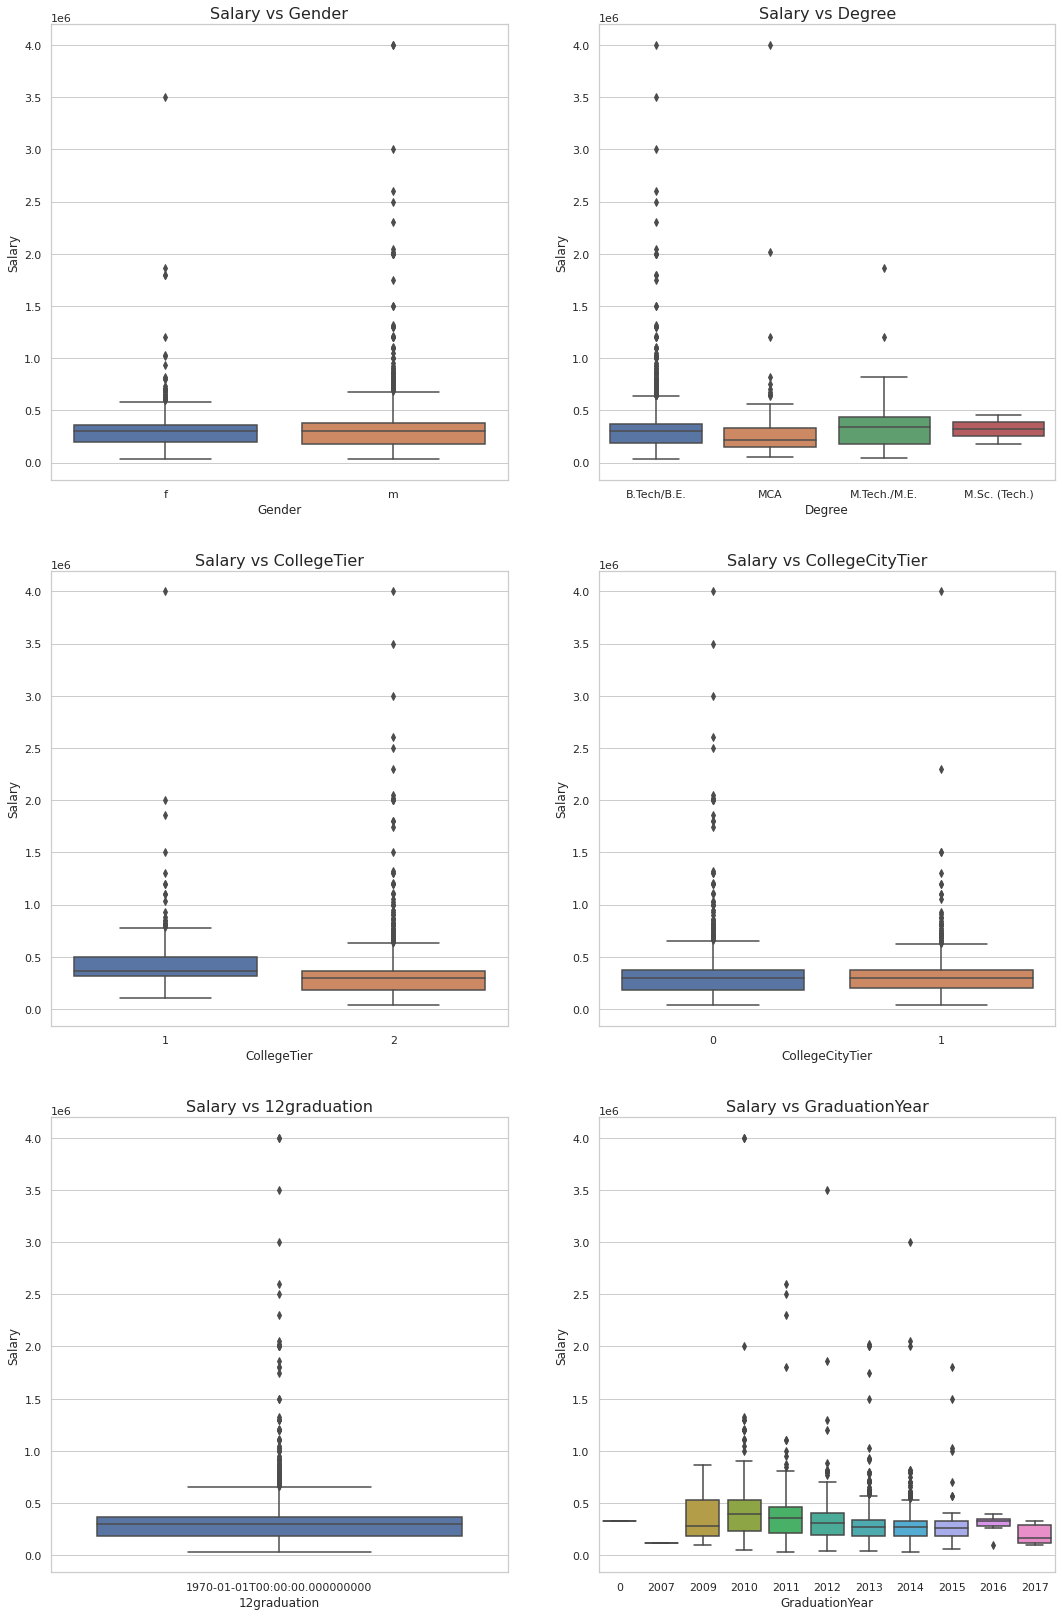

In [129]:
attributes = ['Gender','Degree','CollegeTier','CollegeCityTier','12graduation','GraduationYear']
sns.set_style('whitegrid')
fig , axes = plt.subplots(nrows = 3 , ncols = 2 , figsize = (18,20))
fig.subplots_adjust(top = 1.2)
count = 0

for i in range(3):
    for j in range(2):
        sns.boxplot(data = df , y = 'Salary' , x = attributes[count] , ax = axes[i,j])
        axes[i,j].set_title(f"Salary vs {attributes[count]}", fontsize=16)
        count += 1

##Relation Between Numerical Columns using pair plot

<Figure size 1440x1080 with 0 Axes>

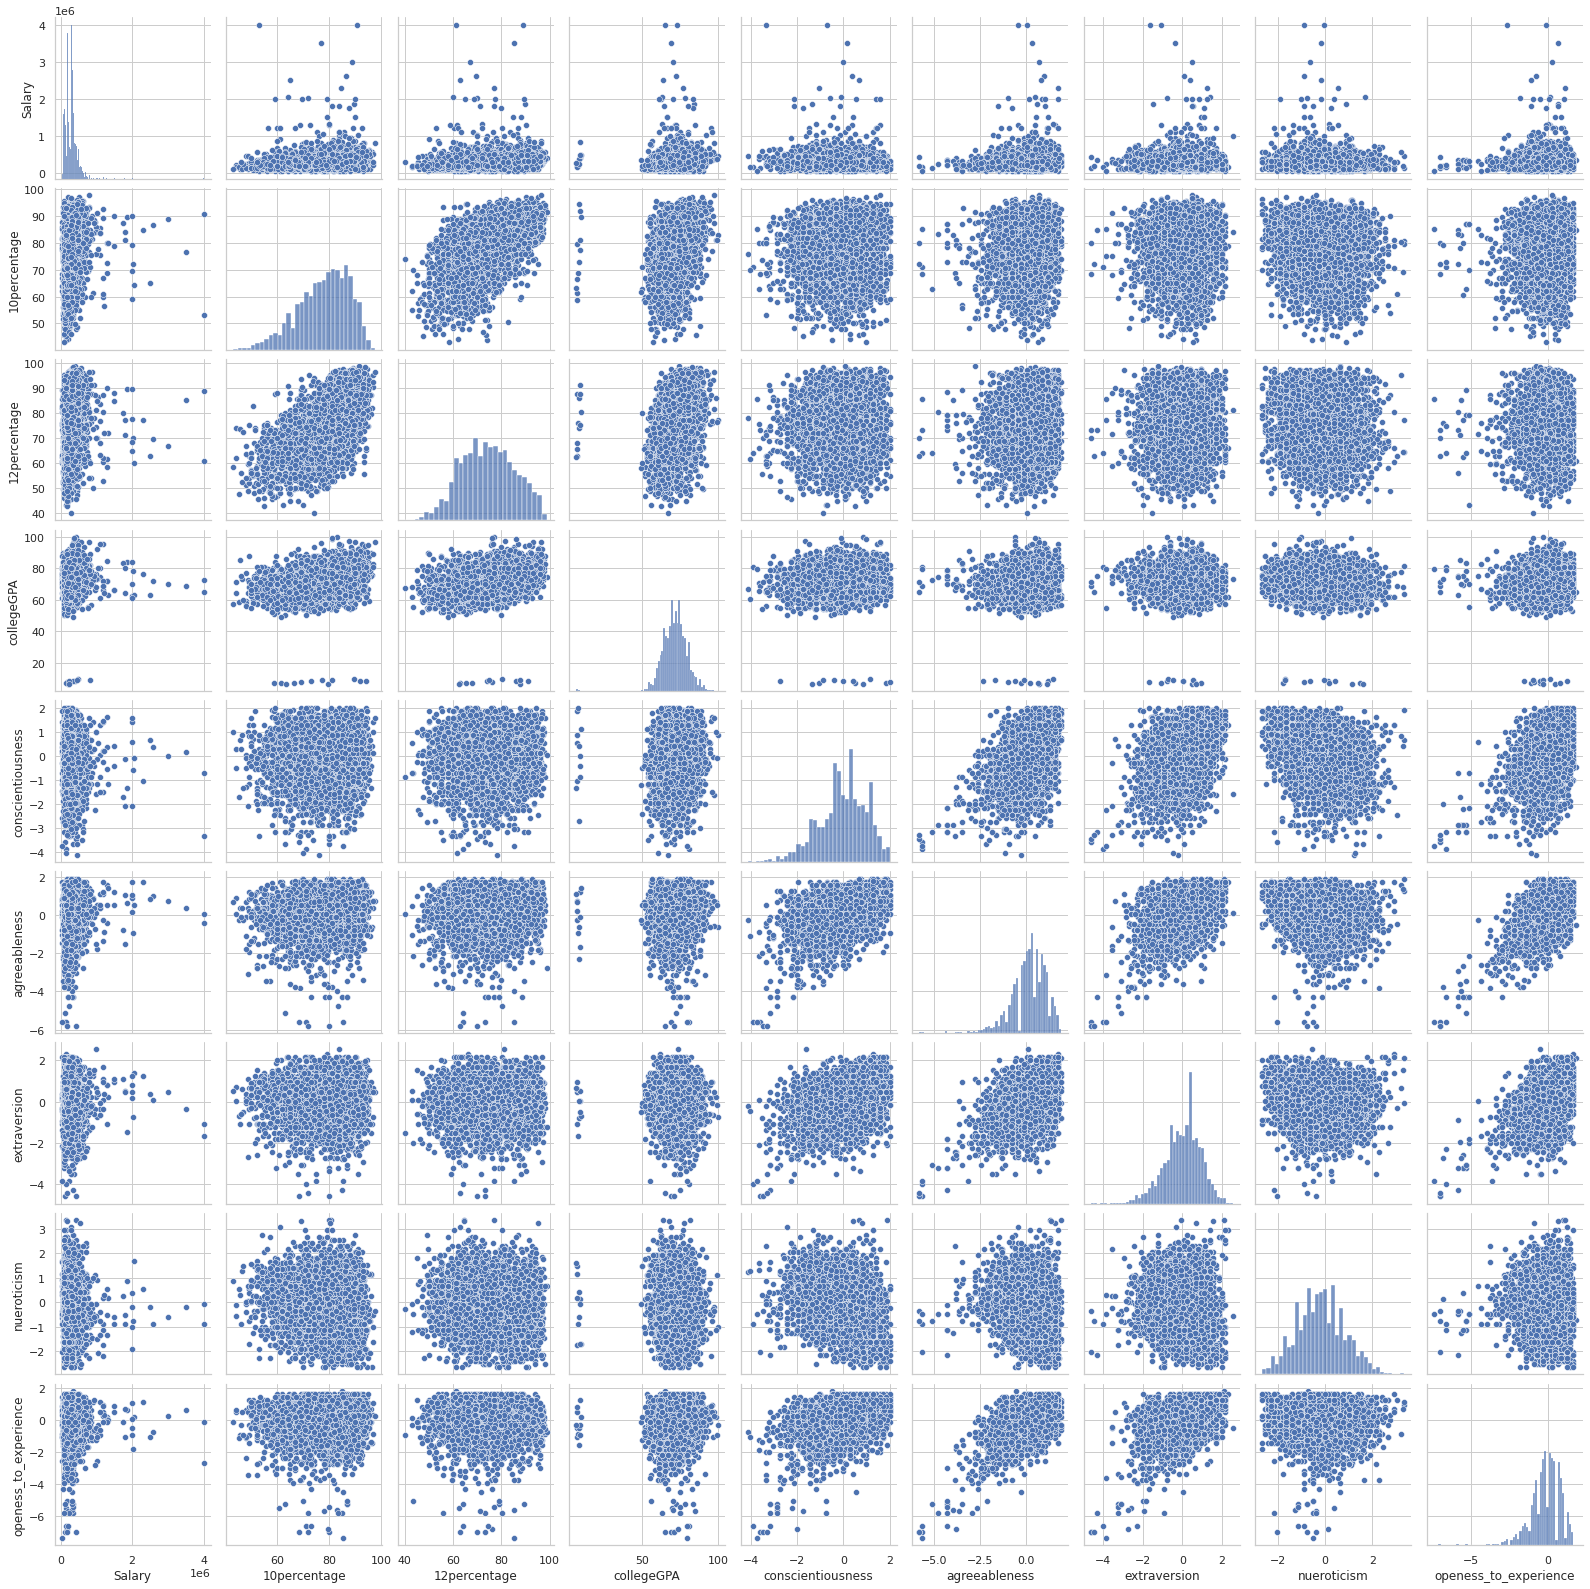

In [130]:
plt.figure(figsize=(20,15))
data = df[['Salary','10percentage','12percentage','collegeGPA', 'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

In [131]:
#Relation Between Continous variables
df['10percentage'].corr(df['12percentage'])

0.6433777960234051

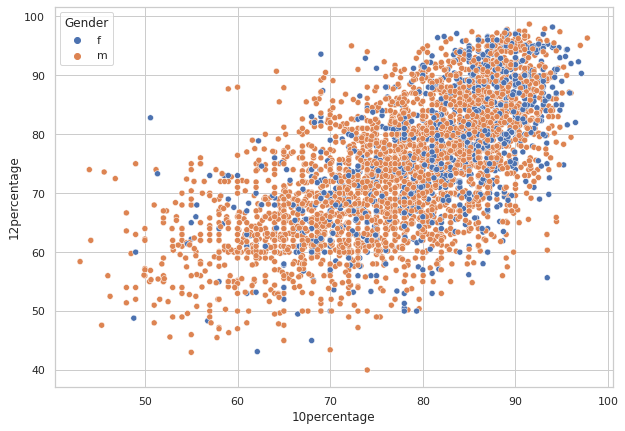

In [132]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="10percentage",y="12percentage",data=df,hue="Gender")
plt.show()

##Relation between categorical and numerical columns

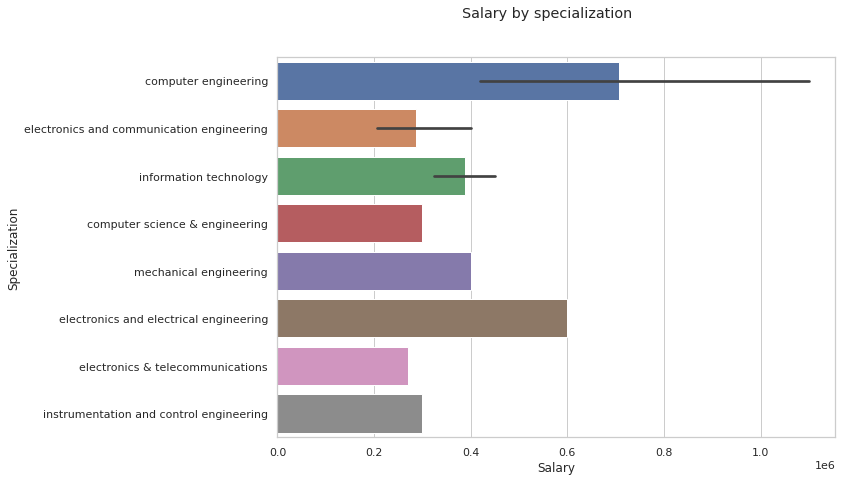

In [133]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Salary'].iloc[:20], y=df['Specialization'].iloc[:15])
plt.suptitle('Salary by specialization')
plt.show()

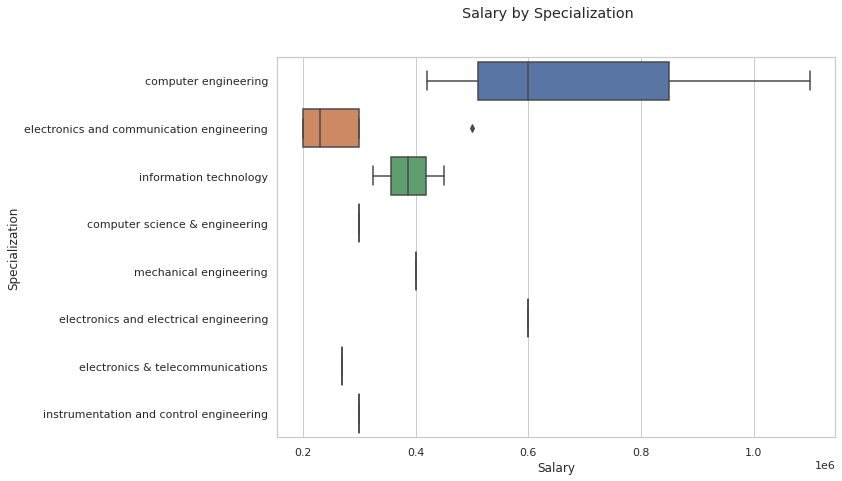

In [134]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['Salary'].iloc[:20], y=df['Specialization'].iloc[:15])
plt.suptitle('Salary by Specialization')
plt.show()

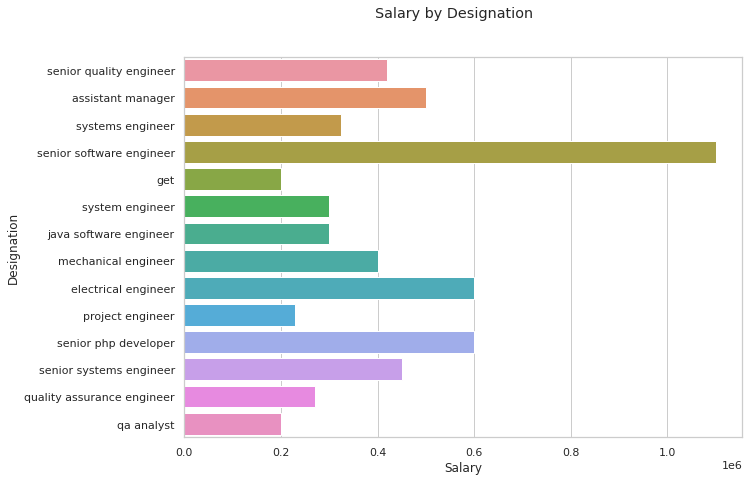

In [135]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Salary'].iloc[:20], y=df['Designation'].iloc[:15])
plt.suptitle('Salary by Designation')
plt.show()

##Salary of these Designation Fields via Gender

In [136]:
top_20_fields=list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]

In [137]:
dsg=df[df["Designation"].isin(top_20_fields)]
dsg.groupby(["Designation"])["Salary"].describe().sort_values("max",ascending=False)

,count,mean,std,min,25%,50%,75%,max
Designation,,,,,,,,
automation engineer,15.0,6.406667e+05,9.481069e+05,110000.0,307500.0,400000.0,512500.0,4000000.0
senior software engineer,72.0,5.440278e+05,4.521737e+05,215000.0,348750.0,455000.0,608750.0,4000000.0
assistant system engineer,23.0,4.823913e+05,6.583500e+05,290000.0,325000.0,350000.0,372500.0,3500000.0
programmer,36.0,3.259722e+05,4.783511e+05,60000.0,148750.0,210000.0,312500.0,3000000.0
application developer,52.0,4.190385e+05,3.878713e+05,40000.0,300000.0,350000.0,411250.0,2600000.0
software test engineer,100.0,3.374500e+05,3.051780e+05,60000.0,218750.0,300000.0,360000.0,2500000.0
software developer,265.0,2.583774e+05,1.784195e+05,50000.0,145000.0,240000.0,340000.0,2300000.0
software engineer trainee,3.0,7.816667e+05,1.099231e+06,105000.0,147500.0,190000.0,1120000.0,2050000.0
operations analyst,12.0,4.437500e+05,5.075302e+05,145000.0,247500.0,290000.0,415000.0,2020000.0


(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text major ticklabel objects>)

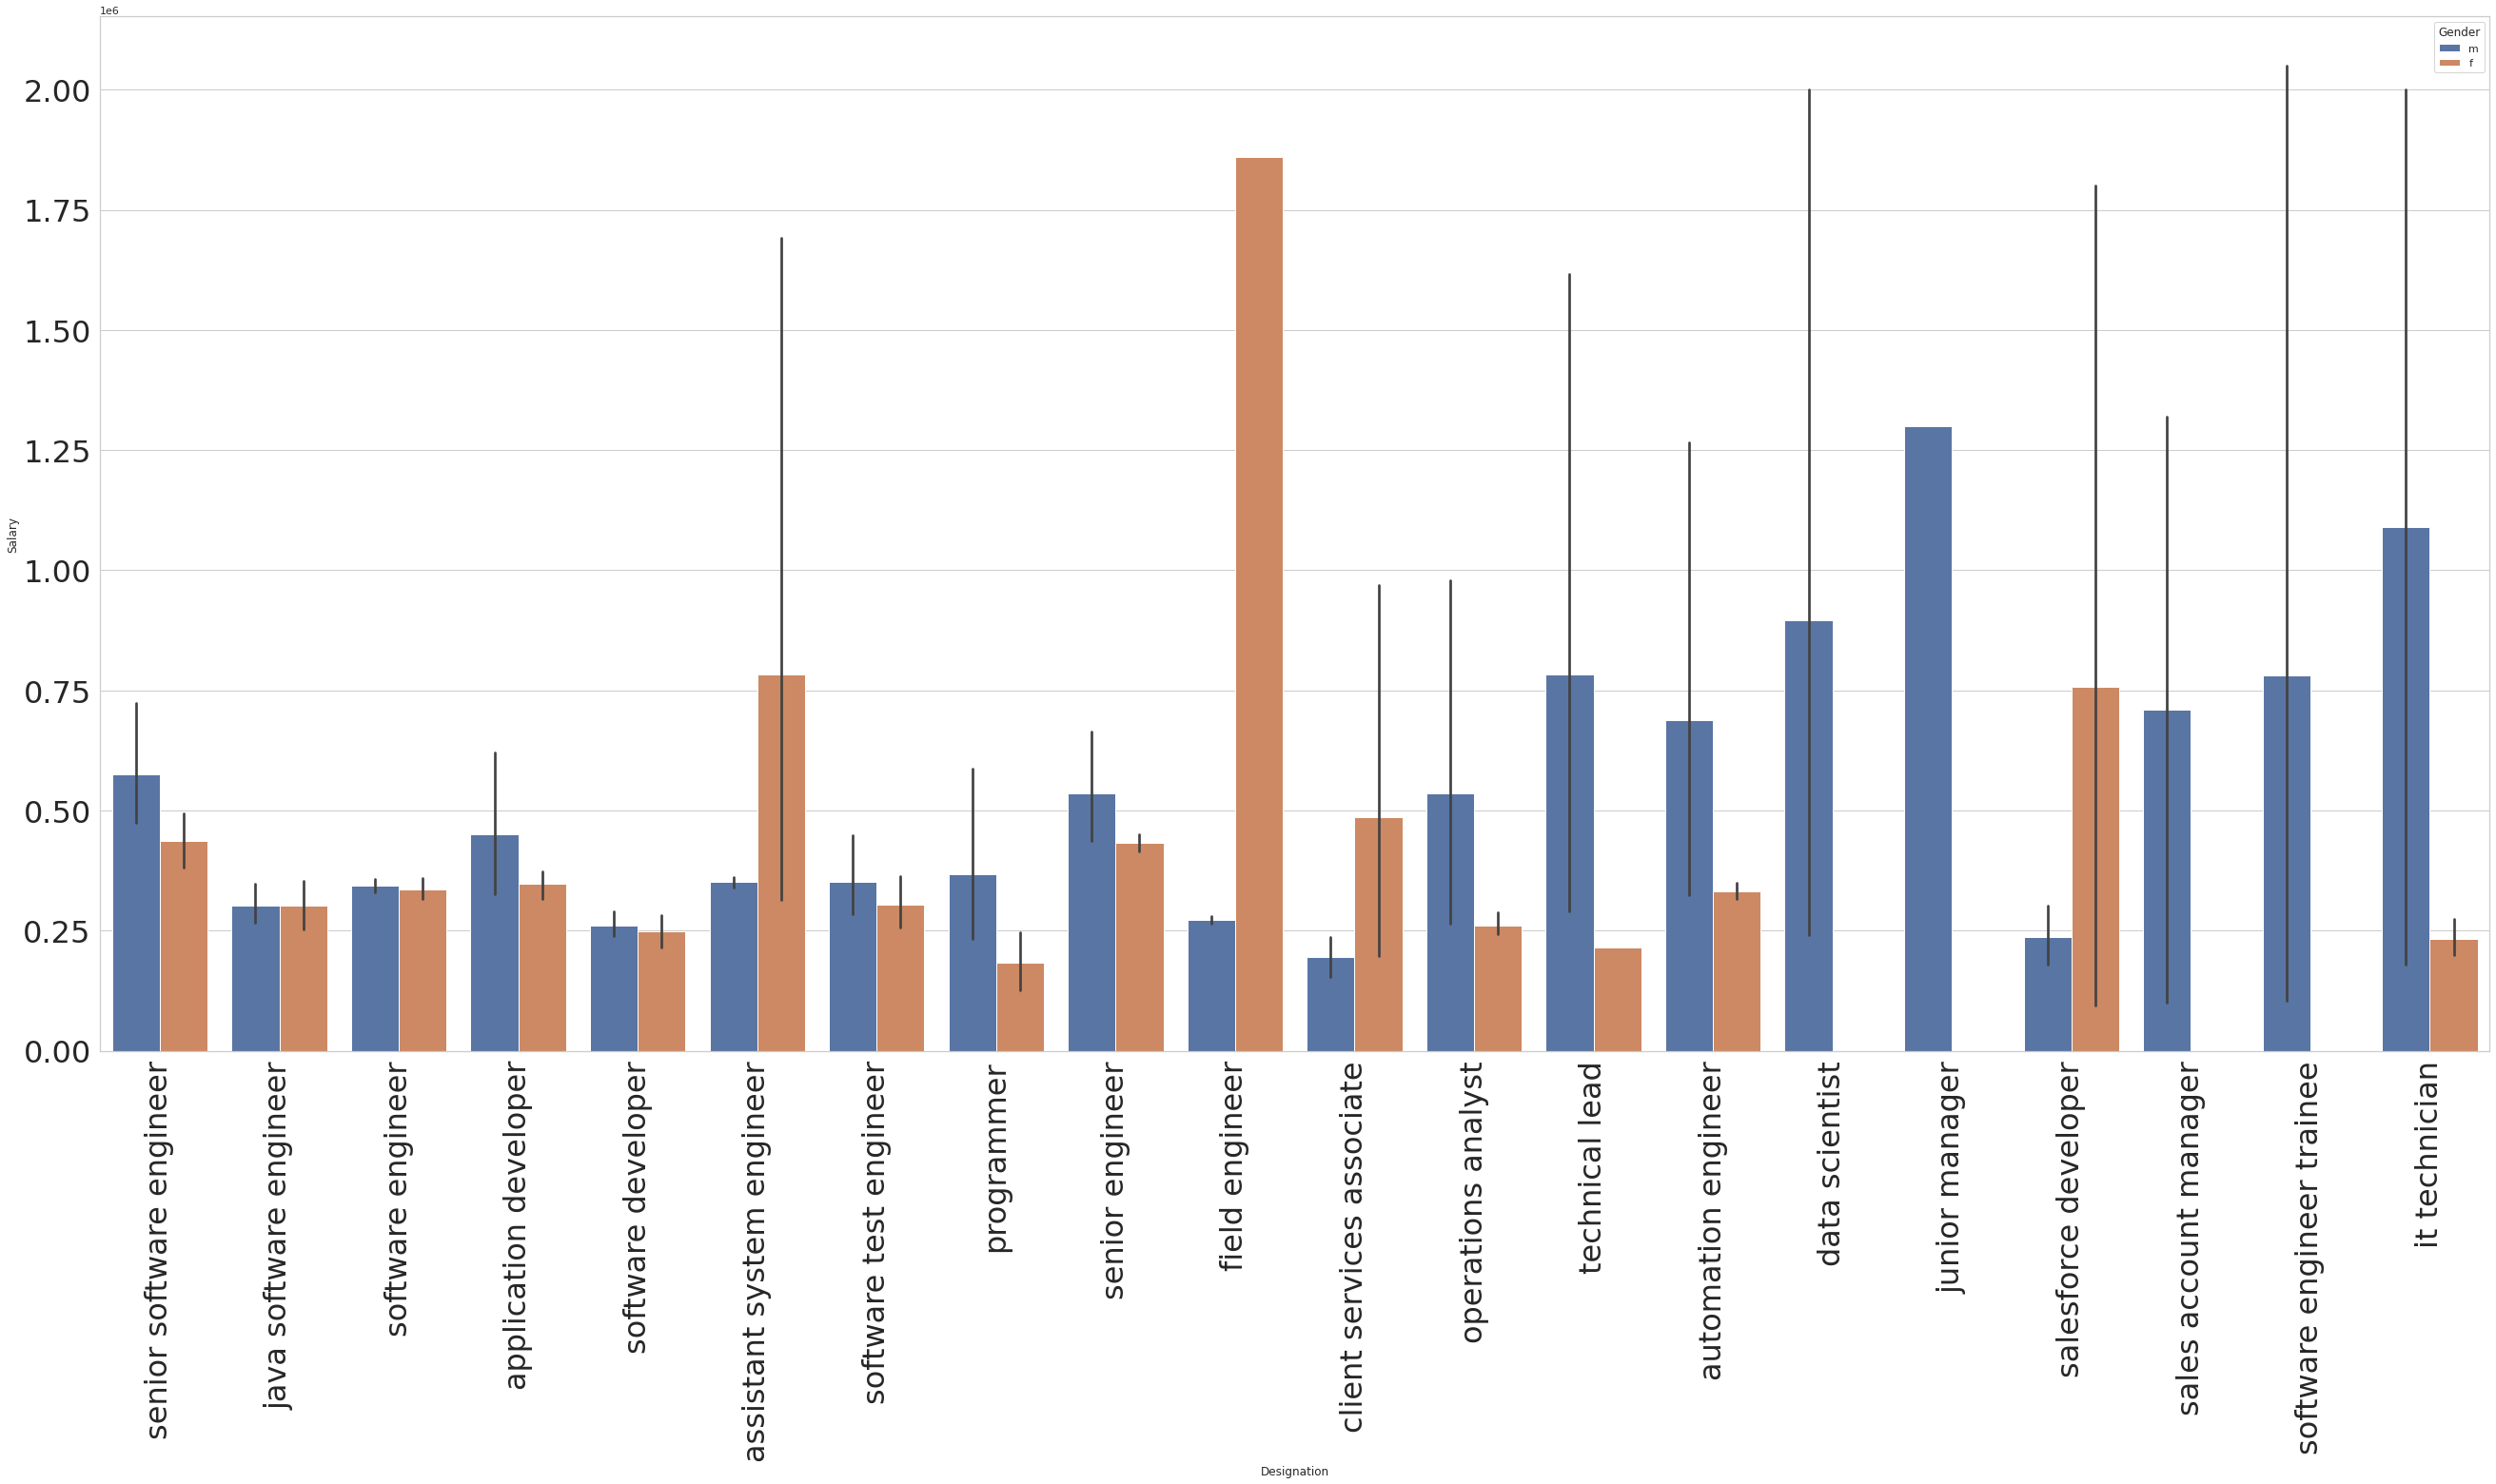

In [138]:
plt.figure(figsize=(45,20))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=dsg)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)

From the Above plot we see that some fields have equal no of gender who have nearly equal salaries while some fields have males who have high salaries while some have female having high salaries. A male with proffesion as Junior manager has max salary while female with field engineer has max salary of all the fields and genders.

##Year wise Employment groupby Gender

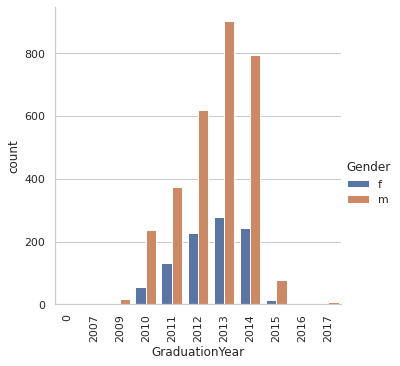

In [139]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

##FINAL CONCLUSION AND ANALYSIS OBSERVATION:

1. SO FINALLY WE INFER THAT MOST OF THE AMCAT ASPIRANTS ARE MALES AND COMING FROM NORTHEN SIDE FROM U.P AND ARE FROM IT DOMAIN WITH MOST OF THEM AS SW ENGINEERS AS PROFFESION WORKING IN BANGLORE WITH DEGREE : SPECIALIZATION AS BE:CSE HAVING EXP OF 4 YRS AND SALARY AROUND 300 K.

2. SO AFTER SW ENGINEER,WE LOOKED AT SECOND HIGHEST PROFFESION IS SW DEVELOPER AND FOR SW DEVELOPER THE AVERAGE SALARY IS 250K AND EXP OF 3 YRS AND LIKE SW ENGG THEY ALSO COME FROM U.P WHO WORK IN BANGLORE AND SPECIALIZATION:DEGREE AS BE:CSE

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data.